# Project Overview and Dataset

# Our task is to classify between four shapes Circle, Square, Star and Trainagle.

### We use<b> Shapes dataset</b> which is available on <a href = https://www.kaggle.com> Kaggle </a> You can view and download the dataset from this  <a href = https://www.kaggle.com/datasets/smeschke/four-shapes> Link <a>. 

In [50]:
# Import librares.
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Helper Function

In [51]:
# Function to read path of image.
def imread(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

# Function to show image.
def imshow(img, figsize = (5, 5)):
    plt.figure(figsize = figsize)
    plt.imshow(img, cmap = 'gray')
    plt.show()
    
# Function to transform image from rgb to binary.
def rgb2bin(img_rgb):
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
    t, img_bin = cv2.threshold(
        img_gray,
        0,
        255,
        cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV
    )
    
    return img_bin

# Function to return the biggest contours from area.
def find_best_contour(img_rgb):
    img_bin = rgb2bin(img_rgb)
    contours, h = cv2.findContours(
        img_bin,
        cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_NONE
    )
    best_contour = max(contours, key = cv2.contourArea)
    
    return best_contour

# Function to draw the contours in image.
def draw_contours(img, contours, index = -1, color = (255, 0, 0), thickness = 2):
    img_copy = img.copy()
    cv2.drawContours(img_copy, contours, index, color, thickness)
    imshow(img_copy)

# Find Contours

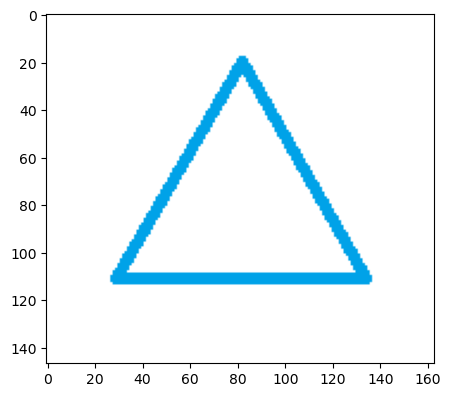

In [52]:
# Read the image.
img = imread('images/triangle-hollow.png')

# Show the images.
imshow(img)

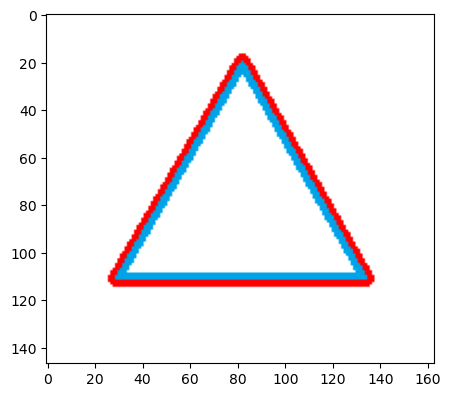

In [53]:
# Find all the contours in image.
best_contour = find_best_contour(img)

# Draw the best contours.
draw_contours(img, best_contour)

In [54]:
best_contour.shape

(299, 1, 2)

# Chain Code Histogram

In [6]:
# To encode all the move in the chain.
lookup_table = {
    (1, 0): 0,
    (1, -1): 1,
    (0, -1): 2,
    (-1, -1): 3,
    (-1, 0): 4,
    (-1, 1): 5,
    (0, 1): 6,
    (1, 1): 7
}

In [7]:
import numpy as np 

hist = np.zeros((8,))

for i in range(len(best_contour) - 1):
    (x1, y1) = best_contour[i][0]
    (x2, y2) = best_contour[i+1][0]
    dx = x2 - x1
    dy = y2 - y1
    code = lookup_table[(dx, dy)]
    print(code, end = '')
    hist[code] += 1
    
print('\n')
print(hist/hist.sum())    

5655656565565655656565565656556565565656556565565656556565565656556565565656556565565656556566700000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000122323233232323323232332323233232323323232332323233232323323232332323233232323323232332323233234

[0.3590604  0.0033557  0.13758389 0.17785235 0.0033557  0.18120805
 0.13422819 0.0033557 ]


In [39]:
# Function to appear all the features in shape.
def chain_hist(img_rgb):
    
    best_contour = find_best_contour(img_rgb)
    
    lookup_table = {
        (1, 0): 0,
        (1, -1): 1,
        (0, -1): 2,
        (-1, -1): 3,
        (-1, 0): 4,
        (-1, 1): 5,
        (0, 1): 6,
        (1, 1): 7
     }
    
    hist = np.zeros((8,))
    
    for i in range(len(best_contour) - 1):
        (x1, y1) = best_contour[i][0]
        (x2, y2) = best_contour[i+1][0]
        dx = x2 - x1
        dy = y2 - y1
        code = lookup_table[(dx, dy)]
        hist[code] += 1
        
    return (hist/hist.sum())

In [40]:
# Appear all the features of the shape.
chain_hist(img)

array([0.3590604 , 0.0033557 , 0.13758389, 0.17785235, 0.0033557 ,
       0.18120805, 0.13422819, 0.0033557 ])

# Read files of dataset

In [41]:
import os
import pandas as pd

def create_df(data_path):
    
    
    class_dict = {
        'circle': 0,
        'square': 1,
        'star': 2,
        'triangle': 3
    }
    
    # We store image path and output in dataframe.
    df = []
    
    # Loop to the four class.
    for class_name, class_value in class_dict.items():
        class_folder = os.path.join(data_path, class_name)
        
        # Loop to the image in folder.
        for f in os.listdir(class_folder):
            f_path = os.path.join(class_folder, f)
            
            # Check you put the right image or not.
            if f_path.lower().endswith('.png'):
                df.append([f_path, class_value])
                
    return pd.DataFrame(df, columns = ['path', 'output'])

In [42]:
# Create data frame.
df = create_df('shapes/')

# Show the data frame.
df.head()

,path,output
0,shapes/circle\0.png,0
1,shapes/circle\1.png,0
2,shapes/circle\10.png,0
3,shapes/circle\100.png,0
4,shapes/circle\1000.png,0


In [43]:
df

,path,output
0,shapes/circle\0.png,0
1,shapes/circle\1.png,0
2,shapes/circle\10.png,0
3,shapes/circle\100.png,0
4,shapes/circle\1000.png,0
...,...,...
14965,shapes/triangle\995.png,3
14966,shapes/triangle\996.png,3
14967,shapes/triangle\997.png,3
14968,shapes/triangle\998.png,3


# Feature Extraction

In [44]:
from tqdm import tqdm

# Function to extract features from shapes.
def extract_features(img_paths):
    n = len(img_paths)
    X = np.zeros((n, 8))
    
    for i in tqdm(range(n)):
        f_path = img_paths[i]
        img = imread(f_path)
        features = chain_hist(img)
        X[i] = features
    return X

In [45]:
# Extraction features from data.
X = extract_features(df['path'])

100%|███████████████████████████████████████████████████████████████████████████| 14970/14970 [00:49<00:00, 302.01it/s]


In [46]:
# Split the output of data.
y = df['output']

y.head()

0    0
1    0
2    0
3    0
4    0
Name: output, dtype: int64

# Splitting data to two parts train and test 

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# Training Model

In [48]:
from sklearn.svm import SVC

# Take object from model.
model = SVC()

# Train model.
model.fit(X_train, y_train)

SVC()

# Calculate Accuracy

In [49]:
from sklearn.metrics import accuracy_score

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9370168909247065
0.9423291026497439


# Function To Test Model

In [56]:
def test_model(model, img_path):
    classes = ['circle', 'square', 'star', 'triangle']
    img = imread(img_path)
    x = chain_hist(img)
    c = model.predict([x])[0]
    print(img_path, '->', classes[c])

In [57]:
# Test multiple shape.
test_model(model, 'images/square.png')
test_model(model, 'images/star.png')
test_model(model, 'images/circle.png')
test_model(model, 'images/triangle.png')
test_model(model, 'images/square-hollow.png')
test_model(model, 'images/star-hollow.png')
test_model(model, 'images/circle-hollow.png')
test_model(model, 'images/triangle-hollow.png')

images/square.png -> square
images/star.png -> star
images/circle.png -> square
images/triangle.png -> triangle
images/square-hollow.png -> square
images/star-hollow.png -> star
images/circle-hollow.png -> square
images/triangle-hollow.png -> triangle
